<a href="https://colab.research.google.com/github/rufetisr/Student-Performace-Project/blob/main/Student_Performace_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# **Uploading the dataset from Kaggle**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")

path += '/Student_Performance.csv'
print("Path to dataset files:", path)

100%|██████████| 48.5k/48.5k [00:00<00:00, 2.03MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nikhil7280/student-performance-multiple-linear-regression/versions/1/Student_Performance.csv


In [ ]:
def get_data():
  return pd.read_csv(path)

df = get_data()


In [ ]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# **Detect if any null values exist**

In [ ]:
def detect_nulls(matx):
   return matx.isnull().any(axis=0).any()

In [ ]:
detect_nulls(df)

False

In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
def clean_data(matx):

    df_copy = matx.dropna()
    return df_copy

In [ ]:
print(clean_data(df))
print(df.shape[0])

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sample Question Papers Practiced 

# We have 'Yes', 'No' values in 'Extracurricular Activities' column, we need to convert it to num values.

In [ ]:
def convert_word_to_num(df):

    df['Extracurricular Activities'] = (df['Extracurricular Activities'].str.lower() == 'yes').astype(int)
    return df


In [ ]:
convert_word_to_num(df)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


# **Splitting dataset for training**

In [ ]:
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']]

y = df['Performance Index']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=532)
#
print('x train: ', X_train.shape)
print('x test: ', X_test.shape)

print('y train: ', y_train.shape)
print('y test: ', y_test.shape)


x train:  (8000, 5)
x test:  (2000, 5)
y train:  (8000,)
y test:  (2000,)


In [ ]:
X_train.head()['Extracurricular Activities']

,Extracurricular Activities
4859,0
4672,1
3429,0
8389,1
4476,1


# **Train the model for Linear regression**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Make Prediction**

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print('prediction: ', y_pred)
print('actual: ', y_test)

prediction:  [73.24226679 28.33230653 65.77573892 ... 37.39334905 55.17277226
 65.24791958]
actual:  3937    76.0
7818    28.0
2418    68.0
4944    73.0
2766    78.0
        ... 
2023    52.0
3363    67.0
7706    37.0
2042    57.0
4968    67.0
Name: Performance Index, Length: 2000, dtype: float64


# **Evaluate the model**

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4.194847666541652


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-score:", r2)

R-score: 0.9887412819290813


In [ ]:
accuracy_score = model.score(X_test, y_test)
print("Accuracy Score:", accuracy_score)

Accuracy Score: 0.9887412819290813


# **Visualize**

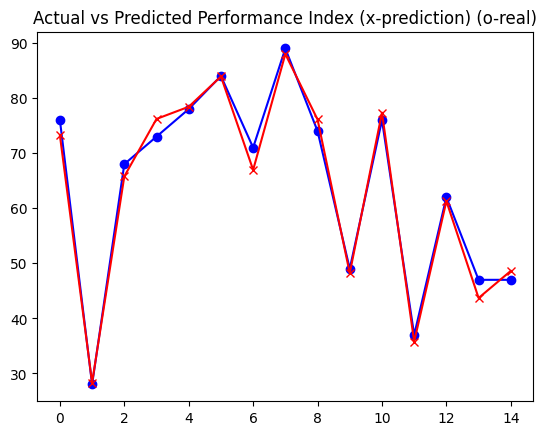

In [ ]:
# Plot the actual values
plt.plot(y_test.values[:15], color='blue', marker='o')

# Plot the predicted values
plt.plot(y_pred[:15], color='red', marker='x')

plt.title('Actual vs Predicted Performance Index (x-prediction) (o-real)')

plt.show()

# **Prediction based on custom values**

In [ ]:
model.predict([[7, 71, 1, 6, 5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([62.69221442])

# **Creating model with Decision tree regression**

In [ ]:
tree_model = DecisionTreeRegressor(random_state=134, max_depth=9)

tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, random_state=134)

# **Prediction**

In [ ]:
y_pred = tree_model.predict(X_test)

# **Model Prediction and Actual values**

In [ ]:
print(y_pred)
print(y_test)

[72.18181818 27.57142857 66.3        ... 37.88888889 54.17777778
 67.33333333]
3937    76.0
7818    28.0
2418    68.0
4944    73.0
2766    78.0
        ... 
2023    52.0
3363    67.0
7706    37.0
2042    57.0
4968    67.0
Name: Performance Index, Length: 2000, dtype: float64


# Evaluate the decision tree model

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6.212624097254393


In [ ]:
accuracy_score = tree_model.score(X_test, y_test)
print("Accuracy Score:", accuracy_score) # by default for regression models, it predicts the r2 score.

Accuracy Score: 0.9833256917171325


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-score:", r2)

R-score: 0.9833256917171325


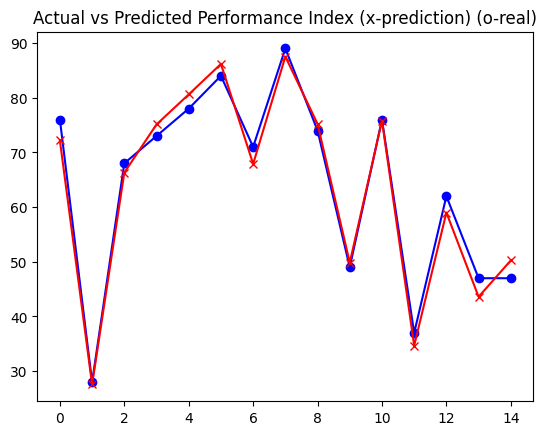

In [ ]:
# Plot the actual values
plt.plot(y_test.values[:15], color='blue', marker='o')

# Plot the predicted values
plt.plot(y_pred[:15], color='red', marker='x')

plt.title('Actual vs Predicted Performance Index (x-prediction) (o-real)')

plt.show()

# K-Means Clustering - High-performing, average-performing, and low-performing students.

In [ ]:
# normalizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=23)
df["Cluster"] = kmeans.fit_predict(X_scaled)  # we apply clustering with features excluding 'Performace Index'

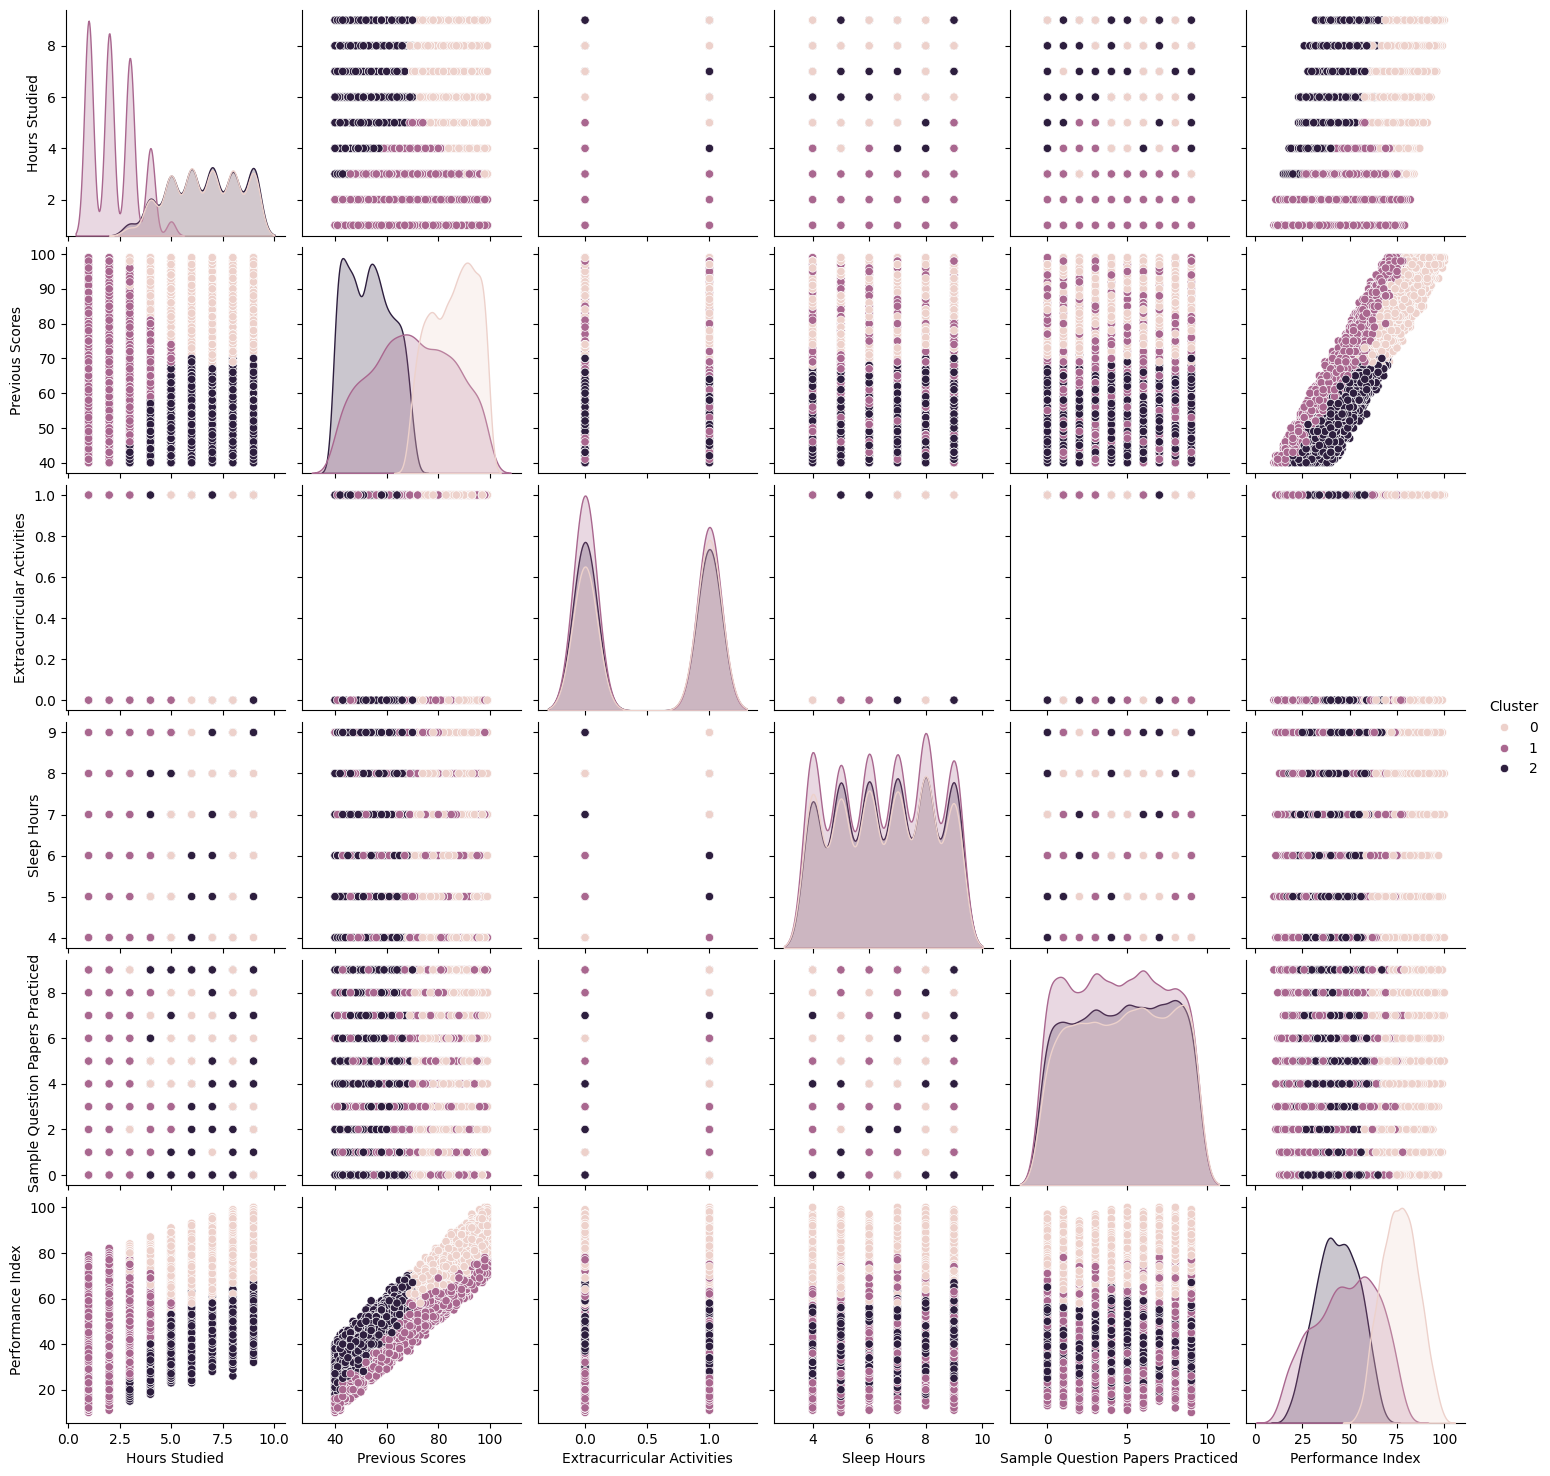

In [ ]:
sns.pairplot(df, hue="Cluster", diag_kind="kde")
plt.show()

In [ ]:
print("Cluster Centers:\n", kmeans.cluster_centers_)
#cluster 0  - probably shows high performing students
# cluster 1  - shows medium performing students
#cluster 2  - shows low performing students
# and these centers shows like the average values of each cluster, basically

Cluster Centers:
 [[ 0.6321469   0.93401464  0.0957472  -0.0107456   0.04956297]
 [-1.05670343  0.03077167 -0.07139523 -0.00499836 -0.04986302]
 [ 0.62472855 -0.93163777 -0.00865701  0.01612867  0.01055323]]
